# Data loading

In [1]:
file = open('A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [2]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [3]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

# Data preprocessing

In [4]:
#TODO: Compute tf-idf for all documents
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfvect = TfidfVectorizer()

# Fit the vectorizer on all data
tfvect.fit(alldata)

# Transform each document into TF-IDF vectors
tfidf = tfvect.transform(alldata).toarray()

# Separate TF-IDF vectors for each document group
TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()

# Similarity computation

In [5]:
#TODO: pair-wise similarity

from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity within each document group
similarityAA = cosine_similarity(TFIDFA, TFIDFA)
similarityBB = cosine_similarity(TFIDFB, TFIDFB)
similarityCC = cosine_similarity(TFIDFC, TFIDFC)
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

# Compute pairwise similarity across all documents
similarityAll = cosine_similarity(tfidf, tfidf)

In [6]:
similarityAA

array([[1.        , 0.81898863],
       [0.81898863, 1.        ]])

In [7]:
similarityBB

array([[1.        , 0.63747903],
       [0.63747903, 1.        ]])

In [8]:
similarityCC

array([[1.        , 0.85723864],
       [0.85723864, 1.        ]])

In [9]:
similarityDD

array([[1.        , 0.91153882, 0.45775827],
       [0.91153882, 1.        , 0.46409641],
       [0.45775827, 0.46409641, 1.        ]])

In [10]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.21594796, 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.18046478, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07994656, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.12146166, 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16298738, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.18176114, 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.91153882, 0.45775827],
       [0.21594796, 0.18046478, 0.07994656, 0.12146166, 0.16298738,
        0.18176114, 0.91153882, 1.        , 0.46409641],


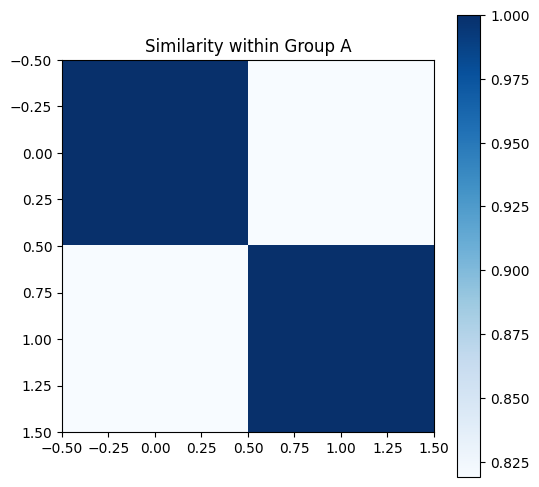

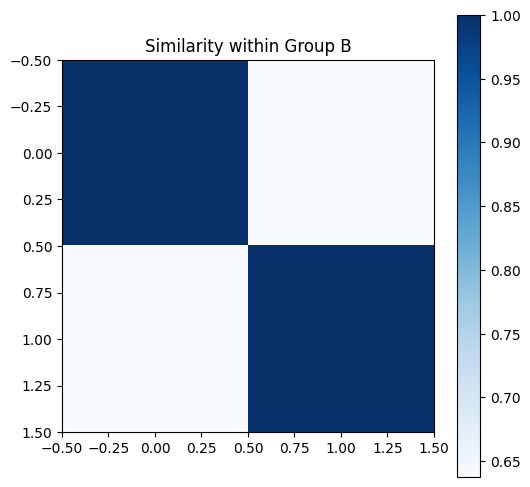

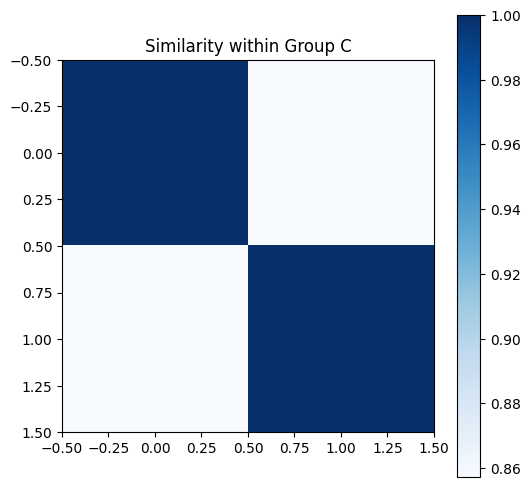

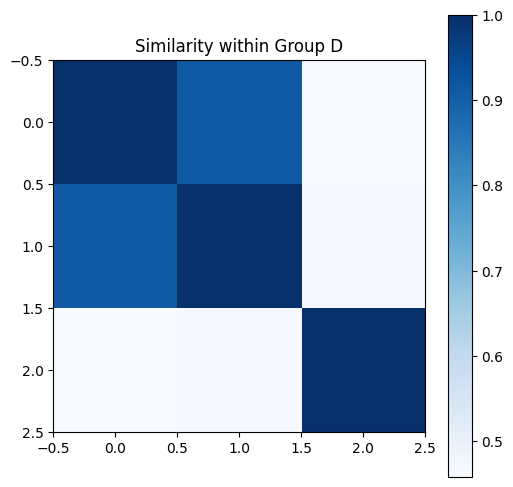

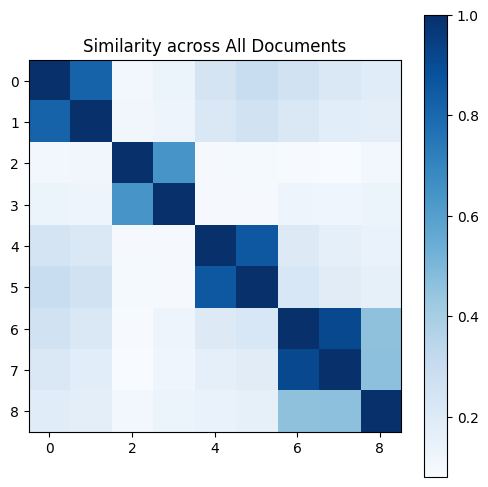

In [11]:
import matplotlib.pyplot as plt

#TODO: show pair-wise similarity

# Function to visualize pair-wise similarity matrices
def visualize_similarity(similarity_matrix, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(similarity_matrix, cmap='Blues', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize pair-wise similarity matrices
visualize_similarity(similarityAA, 'Similarity within Group A')
visualize_similarity(similarityBB, 'Similarity within Group B')
visualize_similarity(similarityCC, 'Similarity within Group C')
visualize_similarity(similarityDD, 'Similarity within Group D')
visualize_similarity(similarityAll, 'Similarity across All Documents')

# Threshold definition

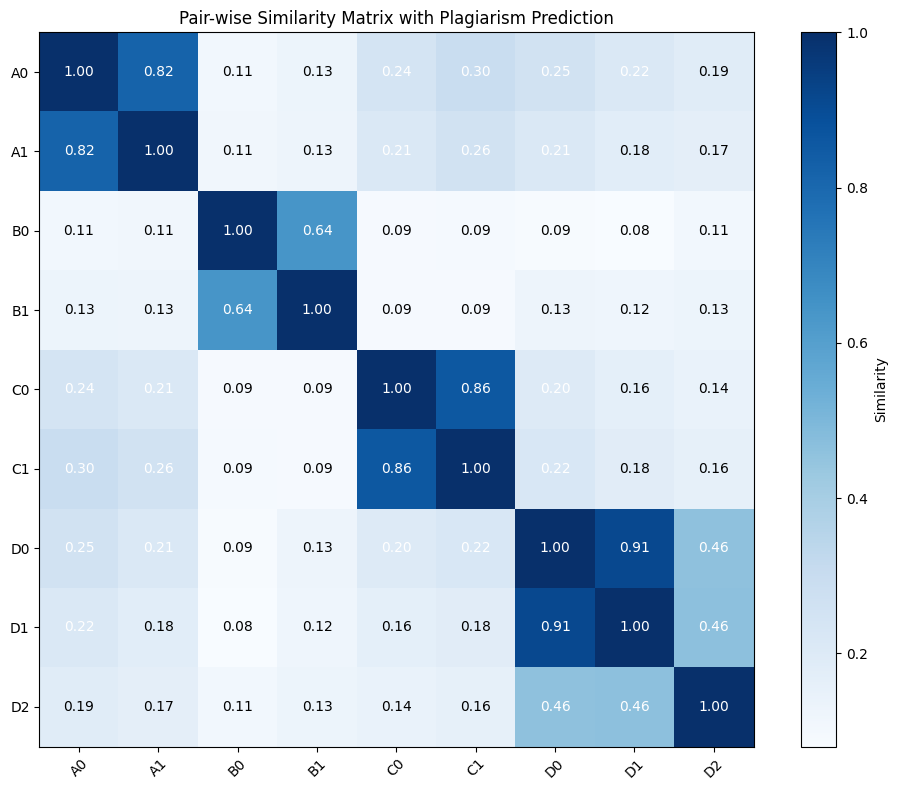

In [12]:
pred_plagiarism = similarityAll>0.2

#TODO: show pair-wise similarity
import numpy as np

# Define the threshold for plagiarism detection
threshold = 0.2

# Visualize the pair-wise similarity matrix with overlaid plagiarism prediction
plt.figure(figsize=(10, 8))
plt.imshow(similarityAll, cmap='Blues', interpolation='nearest')
plt.title('Pair-wise Similarity Matrix with Plagiarism Prediction')
plt.colorbar(label='Similarity')
plt.xticks(ticks=np.arange(len(alldata)), labels=['A0', 'A1', 'B0', 'B1', 'C0', 'C1', 'D0', 'D1', 'D2'], rotation=45)
plt.yticks(ticks=np.arange(len(alldata)), labels=['A0', 'A1', 'B0', 'B1', 'C0', 'C1', 'D0', 'D1', 'D2'])

# Overlay the plagiarism prediction matrix
for i in range(len(alldata)):
    for j in range(len(alldata)):
        color = 'white' if pred_plagiarism[i, j] else 'black'
        plt.text(j, i, f'{similarityAll[i, j]:.2f}', ha='center', va='center', color=color)

plt.tight_layout()
plt.show()

# Perf estimation

Predicted Plagiarism Matrix:
[[1 1 0 0 1 1 1 1 0]
 [1 1 0 0 1 1 1 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [1 1 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 1 1 1]]


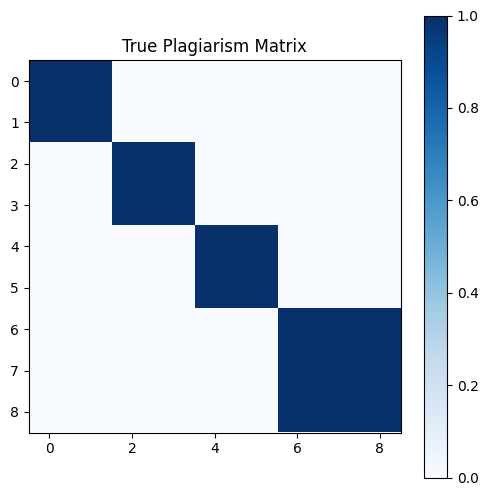

Accuracy Score: 0.78


In [13]:
import numpy as np
real_plagiarism = np.zeros((9,9))

# TODO: build the true labels matrix (to do automatically would be better...)       
# Define threshold for plagiarism detection
threshold = 0.2

# Predict plagiarism based on similarity threshold
pred_plagiarism = similarityAll > threshold

# Print the predicted plagiarism matrix
print("Predicted Plagiarism Matrix:")
print(pred_plagiarism.astype(int))

real_plagiarism[:2, :2] = 1 
real_plagiarism[2:4, 2:4] = 1
real_plagiarism[4:6, 4:6] = 1 
real_plagiarism[6:9, 6:9] = 1 

# Visualize the true labels matrix
plt.figure(figsize=(6, 6))
plt.imshow(real_plagiarism, cmap='Blues', interpolation='nearest')
plt.title("True Plagiarism Matrix")
plt.colorbar()
plt.show()

# Compute accuracy score based on true labels
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(real_plagiarism.flatten(), pred_plagiarism.flatten())
print(f"Accuracy Score: {accuracy:.2f}")

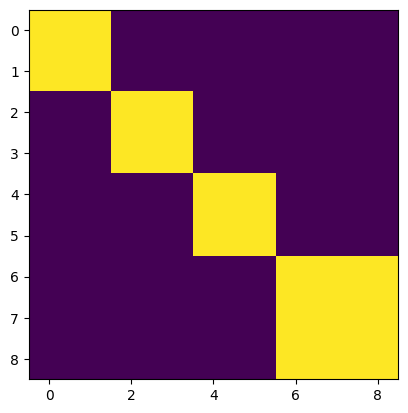

In [14]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

#TODO: compute the accuracy score based on true matrices
from sklearn.metrics import accuracy_score

# Define the ground truth labels (real plagiarism matrix)
real_plagiarism = np.zeros((9, 9))  # Adjust the shape based on your actual labels

# Compute accuracy score
accuracy = accuracy_score(real_plagiarism.ravel(), pred_plagiarism.ravel())

print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.52
